<a href="https://colab.research.google.com/github/israelruiz2005/projeto_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Salvador_Bahia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Salvador Bahia

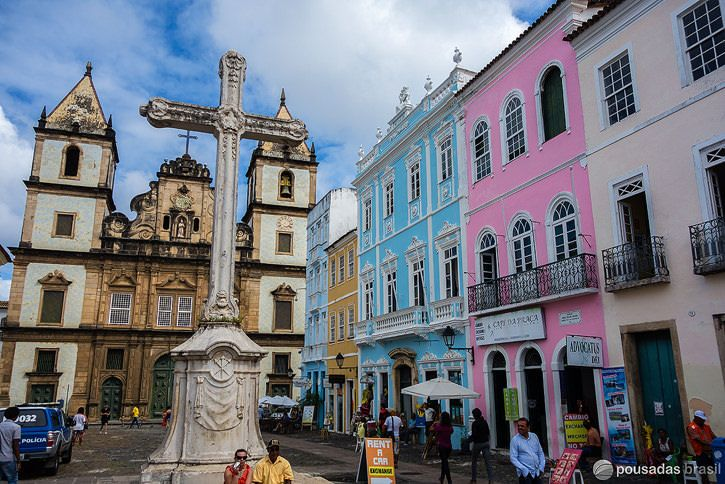


Salvador é destinio certo para todos o que desejam conhecer a primeira Capital do Brasil, suas cores, culturas, religião e historia estão presentes por toda parte. Um turista pode imaginar que a qualquer momento a familia imperial vai passar ao seu lado, ao dobrar uma esquina do pelourinho ou  mesmo que uma das personagens dos contos  de Jorge Amado vai cruzar com ele. Além dos pontos turisticos, tem praias maravilhosa com um povo acolhedor e sorridente. Pode ser que de turista passe para morador, como aconteceu comigo.

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*, infelizmente eles não tinham os dados para minha cidade, Salvador - Bahia, então não foi possivel usar os dados do site para este estudo, para tanto gerei o meu dataset utilizando o site https//my.apify.com, recomendo.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Salvador - Bahia, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Apify](https://apify.com/?utm_source=app).
## Dataset
O dataset gerado pelo site [Apify](https://apify.com/?utm_source=app) foi anexado ao github na pasta DataSet, sua geração foi realizada com uma ferramenta existente de scraping de dados utilizando uma API versão 2 do <img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

Para esta análise exploratória inicial, foi baixado o arquivo gerado pela ferramenta deles e tentei manter alguns nomes similares ao datasete do **inside Airbnb**


# Instalação de pacotes

Para execução deste notebook são necessárias as seguintes instalações:

*   !pip install seaborn
*   !pip install folium




In [1]:
!pip install seaborn
!pip install folium

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [ ]:
# importar o arquivo para um DataFrame
# para execução será necessario baixar o arquivo compactado existente no github
# e realizar o upload do mesmo para o notebook do google colab
df = pd.read_csv("/content/dataset_airbnb-scraper_2021-02-13_23-45-56-881.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1693,1983) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,address,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,pricing/rate/amount_formatted,pricing/rate/currency,pricing/rate/is_micros_accuracy,pricing/rate_type,pricing/rate_with_service_fee/amount,pricing/rate_with_service_fee/amount_formatted,pricing/rate_with_service_fee/currency,pricing/rate_with_service_fee/is_micros_accuracy,reviews/0/author/firstName,reviews/0/author/hasProfilePic,reviews/0/author/id,reviews/0/author/pictureUrl,reviews/0/author/smartName,reviews/0/author/thumbnailUrl,reviews/0/authorId,reviews/0/canBeEdited,reviews/0/collectionTag,reviews/0/comments,reviews/0/createdAt,reviews/0/id,reviews/0/idStr,reviews/0/language,reviews/0/listing/id,reviews/0/listing/listingIdStr,reviews/0/listing/name,reviews/0/listingId,reviews/0/rating,reviews/0/recipient/firstName,reviews/0/recipient/hasProfilePic,reviews/0/recipient/id,reviews/0/recipient/pictureUrl,reviews/0/recipient/smartName,reviews/0/recipient/thumbnailUrl,reviews/0/recipientId,...,reviews/67/idStr,reviews/67/language,reviews/67/listing/id,reviews/67/listing/listingIdStr,reviews/67/listing/name,reviews/67/listingId,reviews/67/rating,reviews/67/recipient/firstName,reviews/67/recipient/hasProfilePic,reviews/67/recipient/id,reviews/67/recipient/pictureUrl,reviews/67/recipient/smartName,reviews/67/recipient/thumbnailUrl,reviews/67/recipientId,reviews/67/response,reviews/67/role,reviews/67/userFlag,reviews/68/author/firstName,reviews/68/author/hasProfilePic,reviews/68/author/id,reviews/68/author/pictureUrl,reviews/68/author/smartName,reviews/68/author/thumbnailUrl,reviews/68/authorId,reviews/68/canBeEdited,reviews/68/collectionTag,reviews/68/comments,reviews/68/createdAt,reviews/68/id,reviews/68/idStr,reviews/68/listing/id,reviews/68/listing/listingIdStr,reviews/68/listing/name,reviews/68/listingId,reviews/68/rating,reviews/68/recipient/firstName,reviews/68/recipientId,roomType,stars,url
0,"Madre de Deus, Bahia, Brazil",-12.74386,-38.61347,Excelente Casa - Madre de Deus,6,37,$37,USD,False,nightly,37,$37,USD,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa particular,NaN,https://www.airbnb.com/rooms/47781696
1,"Madre de Deus, Bahia, Brazil",-12.74454,-38.61758,Quarto com Cama de casal na Mini-Quinta Guesth...,3,48,$48,USD,False,nightly,48,$48,USD,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room in guest suite,NaN,https://www.airbnb.com/rooms/41926796
2,"Centro, Bahia, Brazil",-12.74822,-38.61645,Casa Orla Madre de Deus - Temporada,8,87,$87,USD,False,nightly,87,$87,USD,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire house,NaN,https://www.airbnb.com/rooms/47712051
3,"Bahia, Brazil",-12.74313,-38.61630,Casa inteira em Madre de Deus,10,93,$93,USD,False,nightly,93,$93,USD,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire house,NaN,https://www.airbnb.com/rooms/41332854
4,"Madre de Deus, Bahia, Brazil",-12.74471,-38.61718,Apartamento 1 quarto mobiliado em Madre de Deus,4,19,$19,USD,False,nightly,19,$19,USD,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**



* reviews/0/author/id = id
* name = name
* reviews/0/recipient/id = id anfitriao
* reviews/0/recipient/smartName = anfitriao
* address =neighbourhood - nome do bairro
* location/lat = latitude	
* location/lng = longitude
* roomType = roomType
* pricing/rate/amount=price - preço aluguel do imovel
* last_review 
* stars



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

# Limpeza de alguns campos

Como o dataset gerado não é exatamente igual ao do site **Inside Airbnb**, logo no inicio realizaramos alguns ajustes



1.   O campo 'reviews/0/author/id' tem algumas informações faltando e elas existem no campo 'url', fazemos aqui uma copia destes dados.
2.   Criamos um dicionario e colocamos as colunas com os mesmos nomes. Falicitando assim a comparação.



In [ ]:
df.loc[:, 'reviews/0/author/id'] = df['url'].str.replace("https://www.airbnb.com/rooms/","")

In [ ]:
#df['address']="Salvador"
colunas = {
      "reviews/0/author/id" : "id",
      "name" : "neighbourhood",
      "reviews/0/recipient/id" : "host_id",
      "reviews/0/recipient/smartName" : "host_name",
      "address" : "name",
      "location/lat" : "latitude",	
      "location/lng" : "longitude",
      "roomType" : "roomType",
      "pricing/rate/amount" : "price",
      #"minimum_nights" : "minimum_nights",
      #"number_of_reviews" : "number_of_reviews",
      "reviews/0/createdAt" : "last_review",
      #"reviews_per_month" : "reviews_per_month",
      #"calculated_host_listings_count" : "calculated_host_listings_count",
      #"availability_365" : "availability_365",
      "stars" : "stars"  
}

df.rename(columns=colunas, errors="raise",inplace = True)

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,name,latitude,longitude,neighbourhood,numberOfGuests,price,pricing/rate/amount_formatted,pricing/rate/currency,pricing/rate/is_micros_accuracy,pricing/rate_type,pricing/rate_with_service_fee/amount,pricing/rate_with_service_fee/amount_formatted,pricing/rate_with_service_fee/currency,pricing/rate_with_service_fee/is_micros_accuracy,reviews/0/author/firstName,reviews/0/author/hasProfilePic,id,reviews/0/author/pictureUrl,reviews/0/author/smartName,reviews/0/author/thumbnailUrl,reviews/0/authorId,reviews/0/canBeEdited,reviews/0/collectionTag,reviews/0/comments,last_review,reviews/0/id,reviews/0/idStr,reviews/0/language,reviews/0/listing/id,reviews/0/listing/listingIdStr,reviews/0/listing/name,reviews/0/listingId,reviews/0/rating,reviews/0/recipient/firstName,reviews/0/recipient/hasProfilePic,host_id,reviews/0/recipient/pictureUrl,host_name,reviews/0/recipient/thumbnailUrl,reviews/0/recipientId,...,reviews/67/idStr,reviews/67/language,reviews/67/listing/id,reviews/67/listing/listingIdStr,reviews/67/listing/name,reviews/67/listingId,reviews/67/rating,reviews/67/recipient/firstName,reviews/67/recipient/hasProfilePic,reviews/67/recipient/id,reviews/67/recipient/pictureUrl,reviews/67/recipient/smartName,reviews/67/recipient/thumbnailUrl,reviews/67/recipientId,reviews/67/response,reviews/67/role,reviews/67/userFlag,reviews/68/author/firstName,reviews/68/author/hasProfilePic,reviews/68/author/id,reviews/68/author/pictureUrl,reviews/68/author/smartName,reviews/68/author/thumbnailUrl,reviews/68/authorId,reviews/68/canBeEdited,reviews/68/collectionTag,reviews/68/comments,reviews/68/createdAt,reviews/68/id,reviews/68/idStr,reviews/68/listing/id,reviews/68/listing/listingIdStr,reviews/68/listing/name,reviews/68/listingId,reviews/68/rating,reviews/68/recipient/firstName,reviews/68/recipientId,roomType,stars,url
0,"Madre de Deus, Bahia, Brazil",-12.74386,-38.61347,Excelente Casa - Madre de Deus,6,37,$37,USD,False,nightly,37,$37,USD,False,NaN,NaN,47781696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa particular,NaN,https://www.airbnb.com/rooms/47781696
1,"Madre de Deus, Bahia, Brazil",-12.74454,-38.61758,Quarto com Cama de casal na Mini-Quinta Guesth...,3,48,$48,USD,False,nightly,48,$48,USD,False,NaN,NaN,41926796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room in guest suite,NaN,https://www.airbnb.com/rooms/41926796
2,"Centro, Bahia, Brazil",-12.74822,-38.61645,Casa Orla Madre de Deus - Temporada,8,87,$87,USD,False,nightly,87,$87,USD,False,NaN,NaN,47712051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire house,NaN,https://www.airbnb.com/rooms/47712051
3,"Bahia, Brazil",-12.74313,-38.61630,Casa inteira em Madre de Deus,10,93,$93,USD,False,nightly,93,$93,USD,False,NaN,NaN,41332854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire house,NaN,https://www.airbnb.com/rooms/41332854
4,"Madre de Deus, Bahia, Brazil",-12.74471,-38.61718,Apartamento 1 quarto mobiliado em Madre de Deus,4,19,$19,USD,False,nightly,19,$19,USD,False,NaN,NaN,22701214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Ultimas linhas
df.tail()

,name,latitude,longitude,neighbourhood,numberOfGuests,price,pricing/rate/amount_formatted,pricing/rate/currency,pricing/rate/is_micros_accuracy,pricing/rate_type,pricing/rate_with_service_fee/amount,pricing/rate_with_service_fee/amount_formatted,pricing/rate_with_service_fee/currency,pricing/rate_with_service_fee/is_micros_accuracy,reviews/0/author/firstName,reviews/0/author/hasProfilePic,id,reviews/0/author/pictureUrl,reviews/0/author/smartName,reviews/0/author/thumbnailUrl,reviews/0/authorId,reviews/0/canBeEdited,reviews/0/collectionTag,reviews/0/comments,last_review,reviews/0/id,reviews/0/idStr,reviews/0/language,reviews/0/listing/id,reviews/0/listing/listingIdStr,reviews/0/listing/name,reviews/0/listingId,reviews/0/rating,reviews/0/recipient/firstName,reviews/0/recipient/hasProfilePic,host_id,reviews/0/recipient/pictureUrl,host_name,reviews/0/recipient/thumbnailUrl,reviews/0/recipientId,...,reviews/67/idStr,reviews/67/language,reviews/67/listing/id,reviews/67/listing/listingIdStr,reviews/67/listing/name,reviews/67/listingId,reviews/67/rating,reviews/67/recipient/firstName,reviews/67/recipient/hasProfilePic,reviews/67/recipient/id,reviews/67/recipient/pictureUrl,reviews/67/recipient/smartName,reviews/67/recipient/thumbnailUrl,reviews/67/recipientId,reviews/67/response,reviews/67/role,reviews/67/userFlag,reviews/68/author/firstName,reviews/68/author/hasProfilePic,reviews/68/author/id,reviews/68/author/pictureUrl,reviews/68/author/smartName,reviews/68/author/thumbnailUrl,reviews/68/authorId,reviews/68/canBeEdited,reviews/68/collectionTag,reviews/68/comments,reviews/68/createdAt,reviews/68/id,reviews/68/idStr,reviews/68/listing/id,reviews/68/listing/listingIdStr,reviews/68/listing/name,reviews/68/listingId,reviews/68/rating,reviews/68/recipient/firstName,reviews/68/recipientId,roomType,stars,url
2888,"Pituba, Bahia, Brazil",-13.00296,-38.46174,Suite de Casal na melhor localização da Pituba,4,11,$11,USD,False,nightly,11,$11,USD,False,Jean Lucas,True,39445138,https://a0.muscache.com/im/pictures/user/89b4f...,Jean Lucas,https://a0.muscache.com/im/pictures/user/89b4f...,179239235.0,False,NaN,Agradeço aos meninos pela ótima estadia. O amb...,2020-03-10T18:36:27Z,616725379.0,616725379.0,pt,39445138.0,39445138.0,Suite de Casal na melhor localização da Pituba,39445138.0,5.0,Alexsandro,True,216139166.0,https://a0.muscache.com/im/pictures/user/d11fb...,Alexsandro,https://a0.muscache.com/im/pictures/user/d11fb...,216139166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room in apartment,5.0,https://www.airbnb.com/rooms/39445138
2889,"Barris, Bahia, Brazil",-12.98859,-38.51218,❄️Ar condicionado\n🗺️Bem localizado\n☕Café da ...,10,11,$11,USD,False,nightly,11,$11,USD,False,Robson,True,42232565,https://a0.muscache.com/im/users/38018732/prof...,Robson,https://a0.muscache.com/im/users/38018732/prof...,38018732.0,False,NaN,"Espaço da Ju é bem Central, perto dos pontos t...",2020-02-25T19:57:14Z,610949397.0,610949397.0,pt,42232565.0,42232565.0,❄️Ar condicionado\n️Bem localizado\n☕Café da m...,42232565.0,5.0,Ju,True,125199208.0,https://a0.muscache.com/im/pictures/user/3001d...,Ju,https://a0.muscache.com/im/pictures/user/3001d...,125199208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shared room in house,NaN,https://www.airbnb.com/rooms/42232565
2890,"Salvador, Bahia, Brazil",-12.97475,-38.47358,"Suíte casal próx. rodoviária, metrô, shoppings",2,10,$10,USD,False,nightly,10,$10,USD,False,FLorian,True,15320097,https://a0.muscache.com/im/users/42359832/prof...,FLorian,https://a0.muscache.com/im/users/42359832/prof...,42359832.0,False,NaN,The host canceled this reservation 98 days bef...,2018-11-17T21:55:23Z,349523988.0,349523988.0,en,15320097.0,15320097.0,"Suíte casal próx. rodoviária, metrô, shoppings",15320097.0,0.0,Líliam,True,3

# Mantendo o  dataset original

Criamos um novo dataset somente com as colunas que tem interesse para nosso estudo.

In [ ]:
#Criando novo dataframe
df_novo = df[["id","name","host_id","host_name","neighbourhood","latitude","longitude","roomType","price","last_review","stars"]]

In [ ]:
df_novo.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,roomType,price,last_review,stars
0,47781696,"Madre de Deus, Bahia, Brazil",NaN,NaN,Excelente Casa - Madre de Deus,-12.74386,-38.61347,Casa particular,37,NaN,NaN
1,41926796,"Madre de Deus, Bahia, Brazil",NaN,NaN,Quarto com Cama de casal na Mini-Quinta Guesth...,-12.74454,-38.61758,Private room in guest suite,48,NaN,NaN
2,47712051,"Centro, Bahia, Brazil",NaN,NaN,Casa Orla Madre de Deus - Temporada,-12.74822,-38.61645,Entire house,87,NaN,NaN
3,41332854,"Bahia, Brazil",NaN,NaN,Casa inteira em Madre de Deus,-12.74313,-38.61630,Entire house,93,NaN,NaN
4,22701214,"Madre de Deus, Bahia, Brazil",NaN,NaN,Apartamento 1 quarto mobiliado em Madre de Deus,-12.74471,-38.61718,Entire apartment,19,NaN,NaN


Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão de extração realizada no site, porém foi modificado para conter apenas algumas colunas, neste exercicio.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_novo.shape[0]))
print("Variáveis:\t {}\n".format(df_novo.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_novo.dtypes)

Entradas:	 2893
Variáveis:	 11



id                object
name              object
host_id          float64
host_name         object
neighbourhood     object
latitude         float64
longitude        float64
roomType          object
price              int64
last_review       object
stars            float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `star` possui 54% dos seus valores faltantes. 
* As variáveis `last_review`,`host_name`, `host_id` possuem valores nulos em 36% dos casos.
* As variáveis `name` possui alguns valores nulos .

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_novo.isnull().sum() / df_novo.shape[0]).sort_values(ascending=False)

stars            0.539233
last_review      0.356723
host_name        0.356723
host_id          0.356723
neighbourhood    0.000691
price            0.000000
roomType         0.000000
longitude        0.000000
latitude         0.000000
name             0.000000
id               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

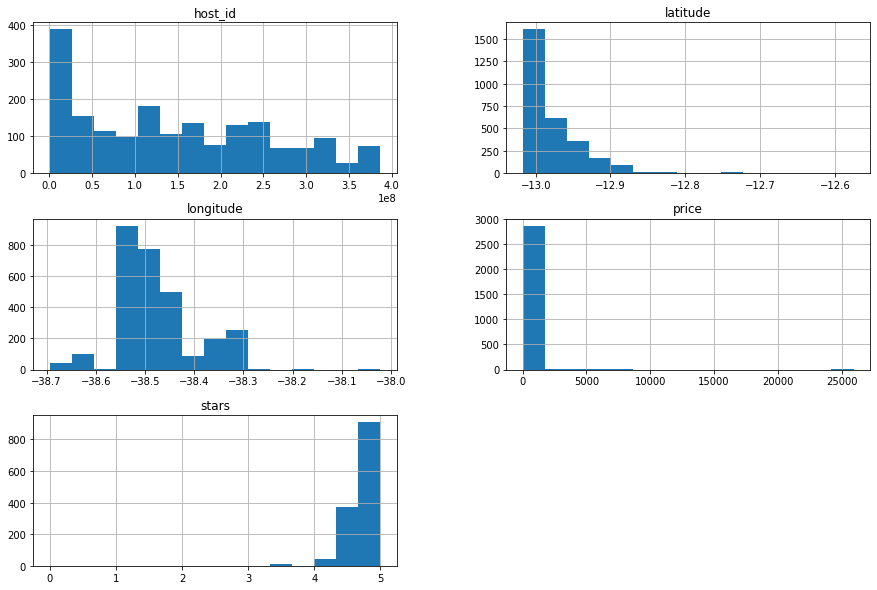

In [ ]:
# plotar o histograma das variáveis numéricas
df_novo.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_novo.describe()

,host_id,latitude,longitude,price,stars
count,1.861000e+03,2893.000000,2893.00000,2893.000000,1333.000000
mean,1.451106e+08,-12.978762,-38.47690,127.033529,4.814329
std,1.110490e+08,0.039197,0.07638,639.354618,0.320468
min,3.835710e+05,-13.017350,-38.69392,10.000000,0.000000
25%,4.267318e+07,-13.006990,-38.52416,22.000000,4.500000
50%,1.281585e+08,-12.992720,-38.50265,37.000000,5.000000
75%,2.340486e+08,-12.964740,-38.44887,78.000000,5.000000
max,3.866487e+08,-12.575010,-38.02126,25923.000000,5.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de **78 USD**, porém seu valor máximo é **25923 USD**.

**OS VALORES DAS DIARIAS  ESTÃO EM USD**


#### Boxplot para price


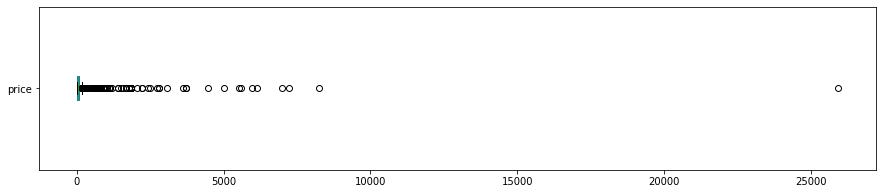


price: valores acima de 1500
34 entradas
1.1753%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

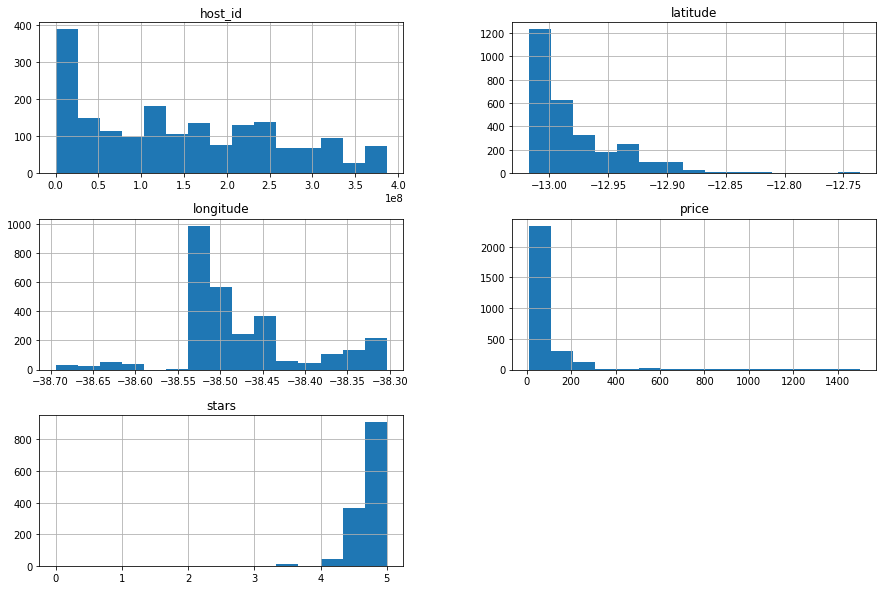

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df_novo.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'stars']].corr()

display(corr)

,price,stars
price,1.000000,0.016314
stars,0.016314,1.000000


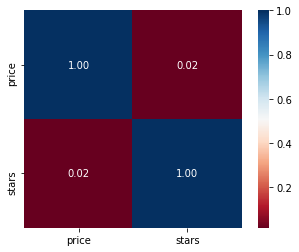

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.roomType.value_counts()

Entire apartment                      1228
Entire house                           306
Private room in apartment              293
Entire condominium                     216
Entire serviced apartment              202
Private room in house                  177
Entire loft                             76
Private room in condominium             63
Private room in bed and breakfast       34
Private room in guest suite             24
Private room in serviced apartment      20
Shared room in house                    19
Entire townhouse                        15
Room in boutique hotel                  15
Entire cottage                          14
Room in serviced apartment              13
Room in hotel                           11
Entire chalet                           11
Entire guest suite                      10
Shared room in apartment                10
Entire guesthouse                        9
Room in aparthotel                       9
Shared room in bed and breakfast         7
Private roo

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.roomType.value_counts() / df_clean.shape[0])*100

Entire apartment                      42.952081
Entire house                          10.703043
Private room in apartment             10.248339
Entire condominium                     7.555089
Entire serviced apartment              7.065407
Private room in house                  6.190976
Entire loft                            2.658272
Private room in condominium            2.203568
Private room in bed and breakfast      1.189227
Private room in guest suite            0.839454
Private room in serviced apartment     0.699545
Shared room in house                   0.664568
Entire townhouse                       0.524659
Room in boutique hotel                 0.524659
Entire cottage                         0.489682
Room in serviced apartment             0.454704
Room in hotel                          0.384750
Entire chalet                          0.384750
Entire guest suite                     0.349773
Shared room in apartment               0.349773
Entire guesthouse                      0

### **Q6. Qual a localidade mais cara de Salvador?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Casa em armação                                      1500.0
Aluguel por temporada Carnaval de Salvador           1396.0
Aluguel para o carnaval 1 semana                     1396.0
Praia de Itapoã- Linda casa                          1212.0
Ap Luxo - Corredor da Vitória REFEIÇÕES INCLUSAS     1117.0
Alugo Apart para o carnaval -                        1117.0
Apart hotel de frente para a praia do Farol Barra    1097.0
Carnaval em Salvador                                 1024.0
Alugo apartamento Barra carnaval 2019                1024.0
Conforto, Design e melhor Praia do Brasil a pé.       968.0
Name: price, dtype: float64

Acima, vemos que bairros como Armação, Itapuã , estão com média de preço superior a de lugares como Farol da Barra e Corredor da Vitória.

Uma pessoa que não conhecesse Salvador poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Armação.

In [ ]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Casa em armação"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Casa em armação"]

(1, 11)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,roomType,price,last_review,stars
19,47796689,"Armação, Bahia, Brazil",NaN,NaN,Casa em armação,-12.99459,-38.44032,Entire house,1500,NaN,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

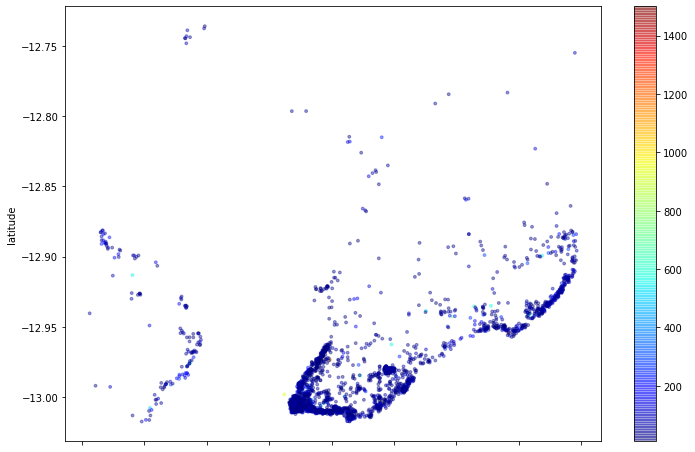

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Outra ferramenta de geolocalização

In [ ]:
# Criaçao de um dataset unico com preços acima de 200 USD
locais_salvador = df_clean[df_clean['price'] >= 500]
locais_salvador.drop_duplicates('id', keep=False)
locais_salvador.groupby('id')



In [ ]:
# Criação do mapa com as coordenada da Bahia
bahia = folium.Map(
    location=[-12.8746532,-38.78185],    # Coordenadas retiradas do Google Maps
    zoom_start=10
)

# Pesquisa dos registros e colocação dos pontos no mapa
for _, cidade in locais_salvador.iterrows():
    folium.Marker(
        location=[cidade['latitude'], cidade['longitude']],
    ).add_to(bahia)

# apresentação do mapa
bahia